<center><img src="https://polytech.univ-lyon1.fr/uas/polytech/LOGO/UDL_logo_blanc-01%20(2).png" alt="drawing" style="width:100px;"/></center>

# Introduction à Python pour la Data Science

## Exercices de Data Manipulation & Visualisation

On souhaite traiter le fichier «Census.xlsx».

«classe»  joue  un  rôle  particulier,  la  variable  indique  le  niveau  de  revenu  c.-à-d.  les  personnes  qui ont un revenu annuel supérieur (more) ou inférieur (less) à un seuil quelconque.

In [1]:
# Importer la librairie Pandas 
import pandas as pd;

### Question 1

- Charger le fichier«Census.xlsx» (read_excel)
- Combien y a-t-il de variables dans le fichier ? 
- Combien y a-t-il d’observations? (info)

In [2]:
df_census=pd.read_excel("/Users/abdoullatifomarjee/Documents/Notebooks-Jupyter/Analyse de données/Census.xlsx")

In [5]:
df_census.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,classe
0,41,State-gov,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,more
1,50,Private,Masters,Divorced,Sales,Not-in-family,White,Female,50,United-States,more
2,24,Private,7th-8th,Separated,Machine-op-inspct,Own-child,White,Male,40,United-States,less
3,27,Without-pay,HS-grad,Never-married,Farming-fishing,Own-child,White,Female,40,United-States,less
4,50,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,less


In [12]:
taille=len(df_census)
taille

48842

### Question 2

- Afficher le résumé des données (describe)

In [3]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   marital_status  48842 non-null  object
 4   occupation      48842 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   hours_per_week  48842 non-null  int64 
 9   native_country  48842 non-null  object
 10  classe          48842 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.1+ MB


In [4]:
df_census.describe()

,age,hours_per_week
count,48842.000000,48842.000000
mean,38.643585,40.422382
std,13.710510,12.391444
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


### Question 3

- quelle  est  la proportion des  hommes ? 
- celle des «classe= more»?

In [16]:
df_census["sex"].value_counts()["Male"] / taille

0.6684820441423365

In [17]:
df_census["classe"].value_counts()["more"] /taille

0.23928176569346055

### Question 4


- Construire  le  diagramme  à  bandes  pour  les  variables  «marital_status»  et  «relationship» (http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html; bar).

- Pour les mêmes variables, construire les diagrammes à secteurs (http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html; pie).

<Axes: xlabel='marital_status'>

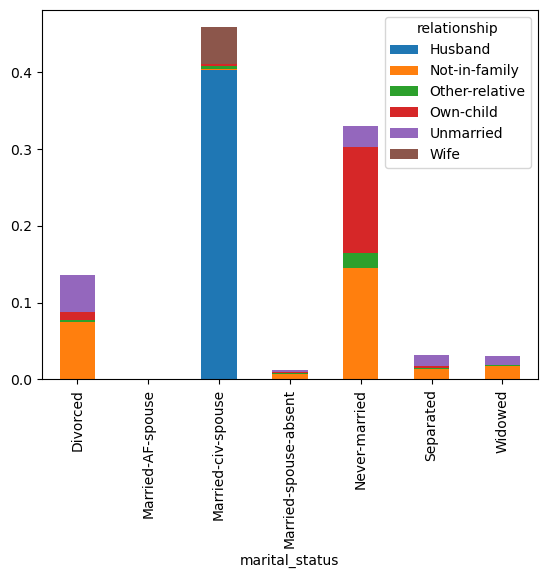

In [19]:
import matplotlib.pyplot as plt
df_census[["marital_status","relationship"]].value_counts(normalize=True).unstack().plot.bar(stacked=True)

array([<Axes: ylabel='count'>], dtype=object)

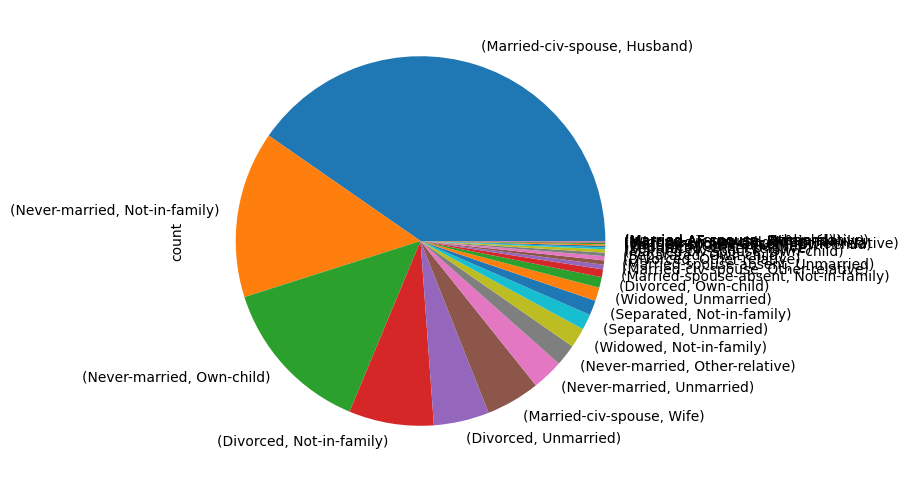

In [22]:
df_census[["marital_status","relationship"]].value_counts().plot.pie(figsize=(6, 6),subplots=True)

### Question 5

- Croiser  les  variables  «classe»  et  « sex».  
- Quelle  est  la  proportion  des  «more»  parmi  les hommes? 
- Parmi les femmes? Est-ce  que ce résultat nous permet  de conclure que  le niveau de revenu est différent selon que l’on est un homme ou une femme? (crosstab)

In [25]:
pd.crosstab(df_census["classe"],df_census["sex"])

sex,Female,Male
classe,,
less,14423,22732
more,1769,9918


la place de la femme c'est à la cuisine

il faudrait faire un test pardi

### Question 6

Croiser maintenant «relationship» et «marital status». Pour chaque valeur de «relationship», quelle  est  la modalité  de  «marital  status»  qui  lui  est  le  plus  associé?  (crosstab+ idxmax).  Que peut-on en conclure?

In [28]:
pd.crosstab(df_census["relationship"],df_census["marital_status"])

marital_status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
relationship,,,,,,,
Husband,0,12,19704,0,0,0,0
Not-in-family,3628,0,23,330,7114,637,851
Other-relative,181,1,201,54,920,79,70
Own-child,455,1,143,61,6750,146,25
Unmarried,2369,0,0,183,1333,668,572
Wife,0,23,2308,0,0,0,0


In [34]:
pd.crosstab(df_census["relationship"],df_census["marital_status"]).idxmax(axis=1)

relationship
Husband           Married-civ-spouse
Not-in-family          Never-married
Other-relative         Never-married
Own-child              Never-married
Unmarried                   Divorced
Wife              Married-civ-spouse
dtype: object

que le mariage c'est plus à la mode

### Question 7

- Nous souhaitons quantifier l’intensité de la liaison entre ces deux variables. 
- Calculer le KHI-2 (https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.chi2_contingency.html)  du  test d’indépendance.     
- Comment pourrait-on qualifier la relation entre ces deux variables?

In [68]:
from scipy.stats import chi2_contingency
cross_RetMS=pd.crosstab(df_census["relationship"],df_census["marital_status"])
chi2_contingency(cross_RetMS.idxmax(axis=0).value_counts())

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=0, expected_freq=array([4., 1., 1., 1.]))

In [40]:
chi2_contingency(pd.crosstab(df_census["relationship"],df_census["marital_status"]).idxmax(axis=0).value_counts())

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=0, expected_freq=array([4., 1., 1., 1.]))

### Question 8

- Penchons-nous maintenant sur la variable «age». Calculer sa moyenne et son écart-type (mean, std) (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)

- Calculer la médiane et les quartiles d’ordre 1 et 3 de l’âge (quantile).

In [42]:
df_census["age"].mean()

38.64358543876172

In [44]:
df_census["age"].std()

13.710509934443207

In [47]:
df_census["age"].median()

37.0

In [51]:
df_census["age"].quantile(0.25)

28.0

In [52]:
df_census["age"].quantile(0.75)

48.0

### Question 9

- Construire  le  graphique  BOXPLOT  (boîte  de  Tukey)  pour  la  variable  «âge»  (boxplot).  Que remarque-t-on?

<Axes: >

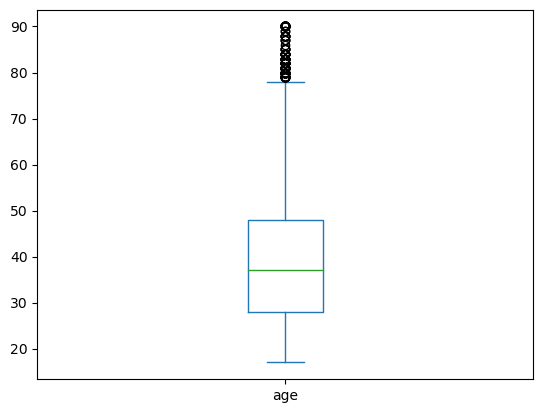

In [53]:
df_census["age"].plot.box()

on remarque que les variables grandes sont très dispersées au contraire des variables les plus faibles

### Question 10

- Produire l’histogramme de la variable âge (hist).

<Axes: ylabel='Frequency'>

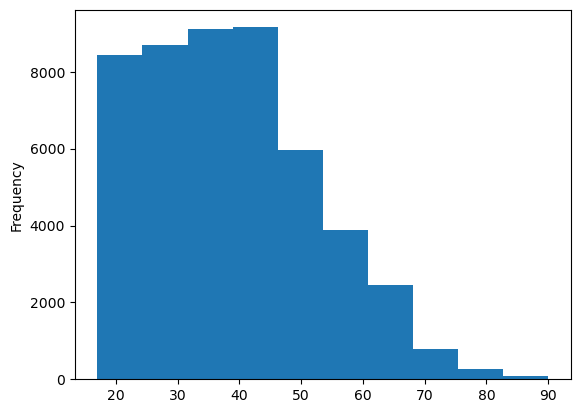

In [54]:
df_census["age"].plot.hist()

### Question 11

- Calculer  la  corrélation  entre  «age»  et  «hours  per  week»  (corr).  Peut-on  dire  que  ces  deux variables sont liées? Réaliser le graphique nuage de points entre ces deux variables pour affiner votre réponse (scatter). Que conclure?


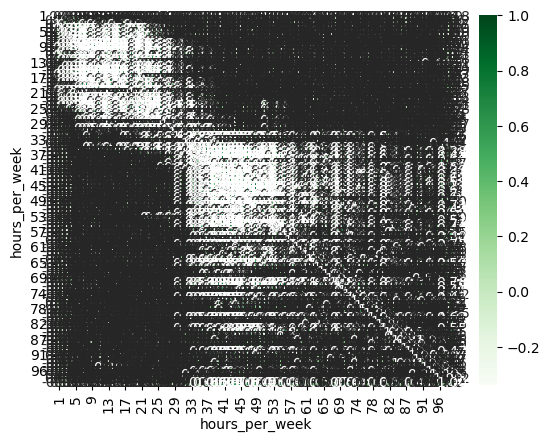

In [60]:
import seaborn as sn

cross=pd.crosstab(df_census["age"],df_census["hours_per_week"]).corr()

sn.heatmap(cross,annot=True,fmt='.2f',cmap='Greens')
plt.show()

### Question 12


- Construire  le  boxplot  de  «âge»  selon  «relationship»  (boxplot).  Il  y  a  des choses  à  remarquer dans ce graphique? 


<Axes: >

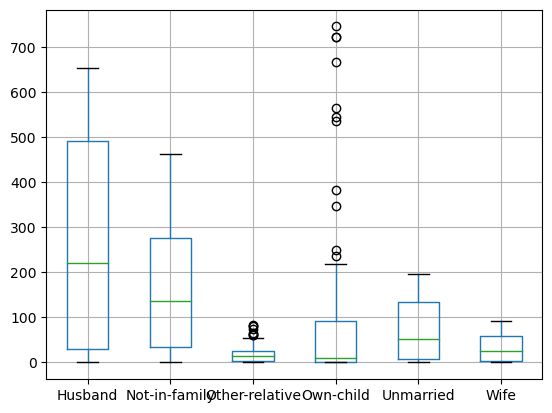

In [59]:
pd.crosstab(df_census["age"],df_census["relationship"]).boxplot()

### Question 13

- Calculer la moyenne de l’âge pour chaque valeur de «relationship»  (pivot_table).  Le  calcul confirme l’impression laissée par le graphique précédent?

In [61]:
pd.crosstab(df_census["age"],df_census["relationship"]).mean(axis=1)

age
17     99.166667
18    143.666667
19    175.500000
20    185.500000
21    182.666667
         ...    
86      0.166667
87      0.500000
88      1.000000
89      0.333333
90      9.166667
Length: 74, dtype: float64

### Question 14


- On s’intéresse à l’influence du niveau d’instruction (education)  sur le  revenu (classe). Créez une variable qui permet d’identifier les personnes ayant un des niveaux suivants: "Bachelors","Masters", "Prof-school", "Doctorate".  Combien d’observations répondent à ce critère? (isin)


In [62]:
df_census['higher_education'] = df_census['education'].isin(['Bachelors', 'Masters', 'Prof-school', 'Doctorate'])

In [64]:
df_census.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,classe,higher_education
0,41,State-gov,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,more,True
1,50,Private,Masters,Divorced,Sales,Not-in-family,White,Female,50,United-States,more,True
2,24,Private,7th-8th,Separated,Machine-op-inspct,Own-child,White,Male,40,United-States,less,False
3,27,Without-pay,HS-grad,Never-married,Farming-fishing,Own-child,White,Female,40,United-States,less,False
4,50,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,less,False


In [65]:
df_census["higher_education"].value_counts()

higher_education
False    36732
True     12110
Name: count, dtype: int64

### Question 15


- Quelle est la proportion de classe = more parmi ces individus, quelle est cette même proportion chez les autres (qui n’ont pas ce niveau d’études). Est-ce que le niveau d’instruction a un impact sur le revenu? (crosstab)

## Enseignant
Patrice Mazel - patrice.mazel@protonmail.com - 3A MAM 2023/2024

In [48]:
whos

Variable           Type         Data/Info
-----------------------------------------
chi2_contingency   function     <function chi2_contingency at 0x1484516c0>
df_census          DataFrame           age    workclass  <...>[48842 rows x 11 columns]
pd                 module       <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
plt                module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
taille             int          48842
